In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import RESOURCE_DIR

In [2]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA_COMPLET

# Ler os dois arquivos .xlsx
df = pd.read_excel(ANNOTATED_FILE_JAVA_COMPLET, keep_default_na=False, sheet_name='2021')
df1 = df[df['discardReason'] == ''] #filtra os projetos sem discardReason
#df1 = pd.read_excel('arquivo2.xlsx')  # DataFrame 2

type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df2 = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

# Verificar quais itens da coluna 'name' em df1 estão presentes na coluna 'projects' de df2
itens_presentes = df2['name'].isin(df1['name'])

# Exibir o resultado: True para os itens que estão presentes, False para os que estão faltando
#print(itens_presentes)

# Filtrar os itens que estão presentes
nomes_presentes = df2[itens_presentes]
#print("Itens presentes em ambas as colunas:")
#print(nomes_presentes)

# Filtrar os itens que estão faltando
nomes_faltando = df2[~itens_presentes]
#print("\nItens da coluna 'name' que estão faltando em 'projects':")
#print(nomes_faltando)

# Converter as colunas para sets
names_set = set(df1['name'])
projects_set = set(df2['name'])

# Verificar se os conjuntos são iguais
if names_set == projects_set:
    print("Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).")
else:
    print("As colunas 'name' e 'projects' têm valores diferentes.")
    
# Itens presentes em 'name' mas não em 'projects'
names_faltando = names_set - projects_set
print("\nItens presentes em 'name' mas não em 'projects':", names_faltando)

# Itens presentes em 'projects' mas não em 'name'
projects_faltando = projects_set - names_set
print("Itens presentes em 'projects' mas não em 'name':", projects_faltando)

if len(df1['name']) == len(df2['name']):
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são iguais.")
else:
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são diferentes.")

duplicados_projects = df2['name'].duplicated(keep=False)

# Filtrar os projetos duplicados
projetos_duplicados = df2.loc[duplicados_projects, 'name'].unique()

if len(projetos_duplicados) > 0:
    print(f"\nProjetos duplicados: {', '.join(projetos_duplicados)}")
else:
    print("\nNão existem itens duplicados na coluna 'projects'.")



Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).

Itens presentes em 'name' mas não em 'projects': set()
Itens presentes em 'projects' mas não em 'name': set()

As quantidades de itens nas colunas 'name' e 'projects' são iguais.

Projetos duplicados: android


In [3]:
from util import RESOURCE_DIR, IMAGES_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'usage_fan_in_file.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,jOOQ,JDBC,Spring,Hibernate,JPA,EclipseLink,mybatis
0,Activiti,Activiti,Enterprise Resource Planning,18facf90f45c567b3c9040bd83cca7e1c586387f,NaN,2024-10-11 20:12:54+00:00,True,0,0,1,1,1,0,1
1,airbnb,lottie-android,Game,e320c993c4ee501b488dadb0a6bfe64f91ce7404,NaN,2024-10-04 18:54:43+00:00,True,0,0,0,0,0,0,0
2,alibaba,spring-cloud-alibaba,Software Development,fadd6ba4228063ba8a2b25509d85d27d78359b5a,NaN,2024-09-27 12:04:25+00:00,True,0,0,0,1,0,0,1
3,alibaba,nacos,Infrastructure Management,b97116458c756ab35c1aa5e7e45ae77c8ecca356,NaN,2024-10-15 02:13:03+00:00,True,0,0,1,0,0,0,1
4,alibaba,fastjson,Data Management,c942c83443117b73af5ad278cc780270998ba3e1,NaN,2023-05-12 06:16:03+00:00,True,0,0,1,1,1,0,0


In [4]:
columns_to_drop = ['sha1', 'part_commit', 'date_commit', 'isLast', 'owner']
df = df.drop(columns=columns_to_drop)

df.head()

,name,domain,jOOQ,JDBC,Spring,Hibernate,JPA,EclipseLink,mybatis
0,Activiti,Enterprise Resource Planning,0,0,1,1,1,0,1
1,lottie-android,Game,0,0,0,0,0,0,0
2,spring-cloud-alibaba,Software Development,0,0,0,1,0,0,1
3,nacos,Infrastructure Management,0,0,1,0,0,0,1
4,fastjson,Data Management,0,0,1,1,1,0,0


In [5]:
#Numero de projetos usando ORM
(df.iloc[:, 2:].sum(axis=1).sort_values(ascending=False) > 0).sum()

241

In [7]:
#Numero de projetos SEM ORM
(df.iloc[:, 2:].sum(axis=1).sort_values(ascending=False) == 0).sum()

121

In [5]:
data_with_index = df.set_index("name")
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,domain,jOOQ,JDBC,Spring,Hibernate,EclipseLink,mybatis
name,,,,,,,
Activiti,Enterprise Resource Planning,0,0,1,1,0,1
lottie-android,Game,0,0,0,0,0,0
spring-cloud-alibaba,Software Development,0,0,0,1,0,1
nacos,Infrastructure Management,0,0,1,0,0,1
fastjson,Data Management,0,0,1,1,0,0


In [6]:
data_jpa = df[["name", "domain", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    94
dtype: int64

In [7]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        192
Hibernate      122
Spring          64
EclipseLink     17
jOOQ            10
JDBC             0
dtype: int64

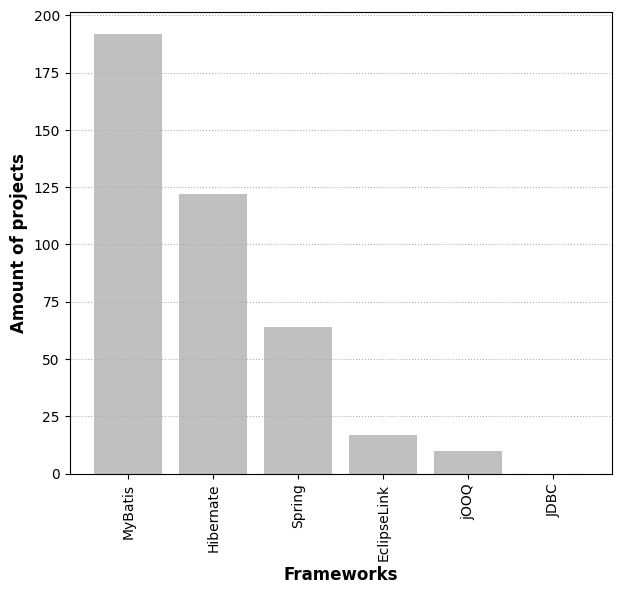

In [8]:
# Renomeia a coluna "mybatis" para "MyBatis"
data_with_index = data_with_index.rename(columns={"mybatis": "MyBatis"})

# Define o tamanho da figura
plt.figure(figsize=(7,6))

# Remove a função addlabels, que adicionava as contagens no topo das barras
# def addlabels(x, y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')

# Prepara os dados
df = data_with_index.iloc[:, 1:].sum().sort_values(ascending=False)

# Cria o gráfico de barras
plt.bar(df.index, df.values, color='silver')

# Rotaciona os rótulos do eixo X
plt.xticks(rotation=90)

# Adiciona os rótulos dos eixos
plt.xlabel("Frameworks", fontweight="bold", fontsize=12)
plt.ylabel("Amount of projects", fontweight="bold", fontsize=12)

# Adiciona grid pontilhado no eixo Y
plt.grid(axis='y', linestyle=':', linewidth=0.8)

# Salva o gráfico em formato PDF
plt.savefig(IMAGES_DIR + "/fig5.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [9]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA_COMPLET, USAGE_FAN_IN_FILE

# Ler os dois arquivos .xlsx
df = pd.read_excel(ANNOTATED_FILE_JAVA_COMPLET, keep_default_na=False, sheet_name='2021')
df1 = df[df['discardReason'] == ''] #filtra os projetos sem discardReason
#df1 = pd.read_excel('arquivo2.xlsx')  # DataFrame 2

df2 = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')

# Verificar quais itens da coluna 'name' em df1 estão presentes na coluna 'projects' de df2
itens_presentes = df2['name'].isin(df1['name'])

# Exibir o resultado: True para os itens que estão presentes, False para os que estão faltando
#print(itens_presentes)

# Filtrar os itens que estão presentes
nomes_presentes = df2[itens_presentes]
#print("Itens presentes em ambas as colunas:")
#print(nomes_presentes)

# Filtrar os itens que estão faltando
nomes_faltando = df2[~itens_presentes]
#print("\nItens da coluna 'name' que estão faltando em 'projects':")
#print(nomes_faltando)

# Converter as colunas para sets
names_set = set(df1['name'])
projects_set = set(df2['name'])

# Verificar se os conjuntos são iguais
if names_set == projects_set:
    print("Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).")
else:
    print("As colunas 'name' e 'projects' têm valores diferentes.")
    
# Itens presentes em 'name' mas não em 'projects'
names_faltando = names_set - projects_set
print("\nItens presentes em 'name' mas não em 'projects':", names_faltando)

# Itens presentes em 'projects' mas não em 'name'
projects_faltando = projects_set - names_set
print("Itens presentes em 'projects' mas não em 'name':", projects_faltando)

if len(df1['name']) == len(df2['name']):
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são iguais.")
else:
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são diferentes.")

duplicados_projects = df2['name'].duplicated(keep=False)

# Filtrar os projetos duplicados
projetos_duplicados = df2.loc[duplicados_projects, 'name'].unique()

if len(projetos_duplicados) > 0:
    print(f"\nProjetos duplicados: {', '.join(projetos_duplicados)}")
else:
    print("\nNão existem itens duplicados na coluna 'projects'.")


Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).

Itens presentes em 'name' mas não em 'projects': set()
Itens presentes em 'projects' mas não em 'name': set()

As quantidades de itens nas colunas 'name' e 'projects' são iguais.

Projetos duplicados: android


In [10]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,N DB-Code Test,N DB-Code Java,N DB-Code XML,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,Activiti,Enterprise Resource Planning,18facf90f45c567b3c9040bd83cca7e1c586387f,NaN,2024-10-11 20:12:54+00:00,True,33.0,44.0,97.0,...,NaN,5151.0,445.0,0.640652,0.854203,1.883129,1.067754,4.173947,NaN,8.639099
1,airbnb,lottie-android,Game,e320c993c4ee501b488dadb0a6bfe64f91ce7404,NaN,2024-10-04 18:54:43+00:00,True,NaN,NaN,NaN,...,NaN,1273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alibaba,spring-cloud-alibaba,Software Development,fadd6ba4228063ba8a2b25509d85d27d78359b5a,NaN,2024-09-27 12:04:25+00:00,True,NaN,4.0,5.0,...,NaN,841.0,17.0,NaN,0.475624,0.594530,NaN,0.951249,NaN,2.021403
3,alibaba,nacos,Infrastructure Management,b97116458c756ab35c1aa5e7e45ae77c8ecca356,NaN,2024-10-15 02:13:03+00:00,True,1.0,14.0,NaN,...,19.0,2935.0,373.0,0.034072,0.477002,NaN,2.010221,9.471891,0.034072,12.708688
4,alibaba,fastjson,Data Management,c942c83443117b73af5ad278cc780270998ba3e1,NaN,2023-05-12 06:16:03+00:00,True,14.0,NaN,12.0,...,1.0,3249.0,61.0,0.430902,NaN,0.369344,1.046476,NaN,NaN,1.877501


In [11]:
data_with_index = df.iloc[: , :].sort_values(by='Total DB', ascending=False)
data_with_index.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,N DB-Code Test,N DB-Code Java,N DB-Code XML,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
56,apereo,cas,Security,bde9ee17c563ff339180d30967c556f07991e604,NaN,2024-10-11 22:16:42+00:00,True,40.0,374.0,2.0,...,46.0,58.0,2999.0,68.965517,644.827586,3.448276,1494.827586,2850.000000,NaN,5170.689655
330,TEAMMATES,teammates,Collaboration,6d4f9f461ad256d9a3e7a2f10e1b6c1281e076eb,NaN,2024-08-07 12:30:38+00:00,True,1.0,78.0,4.0,...,361.0,206.0,980.0,0.485437,37.864078,1.941748,44.174757,204.368932,NaN,475.728155
109,ebean-orm,ebean,Data Management,b6843c6db0be013a6411cd049a5d89a70a7bd15d,NaN,2024-10-10 10:48:29+00:00,True,850.0,23.0,2.0,...,23.0,4286.0,3005.0,19.832011,0.536631,0.046664,38.730751,10.265982,0.023332,70.111993
249,OpenAPITools,openapi-generator,Software Development,2354d402a8813c3893d1499e852fea24c4c941fa,NaN,2024-10-14 11:55:25+00:00,True,2.0,114.0,4.0,...,18163.0,48902.0,25219.0,0.004090,0.233119,0.008180,4.124576,9.868717,0.047033,51.570488
234,MorphiaOrg,morphia,Data Management,abd9a2a688c96bbdd379a7c5ef4d25421d053b11,NaN,2024-10-15 02:41:23+00:00,True,145.0,3.0,1.0,...,63.0,920.0,426.0,15.760870,0.326087,0.108696,20.434783,1.086957,NaN,46.304348


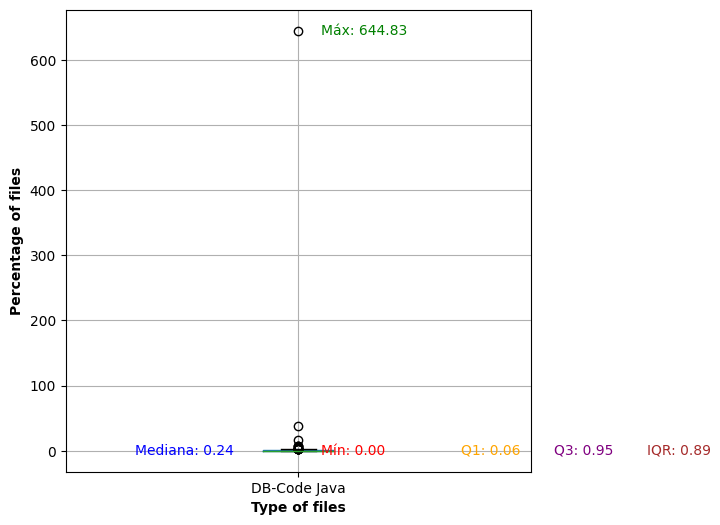

In [12]:
import matplotlib.pyplot as plt

# Configurar a figura
plt.figure(figsize =(6, 6))

# Gerar o boxplot, sem outliers
stud_bplt = df.boxplot(column=['DB-Code Java'])

# Extração das estatísticas do DataFrame (mediana, máximo e mínimo)
stats = df['DB-Code Java'].describe()
mediana = stats['50%']
maximo = stats['max']
minimo = stats['min']
q1 = stats['25%']  # Primeiro quartil (Q1)
q3 = stats['75%']  # Terceiro quartil (Q3)
iqr = q3 - q1      # Intervalo interquartílico (IQR)


# Adicionar as anotações ao gráfico
plt.text(0.65, mediana, f'Mediana: {mediana:.2f}', verticalalignment='center', color='blue')
plt.text(1.05, maximo, f'Máx: {maximo:.2f}', verticalalignment='center', color='green')
plt.text(1.05, minimo, f'Mín: {minimo:.2f}', verticalalignment='center', color='red')
plt.text(1.35, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='orange')
plt.text(1.55, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='purple')
plt.text(1.75, (q1 + q3) / 2, f'IQR: {iqr:.2f}', verticalalignment='center', color='brown')

# Configurações dos eixos
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")

# Mostrar o gráfico
plt.show()


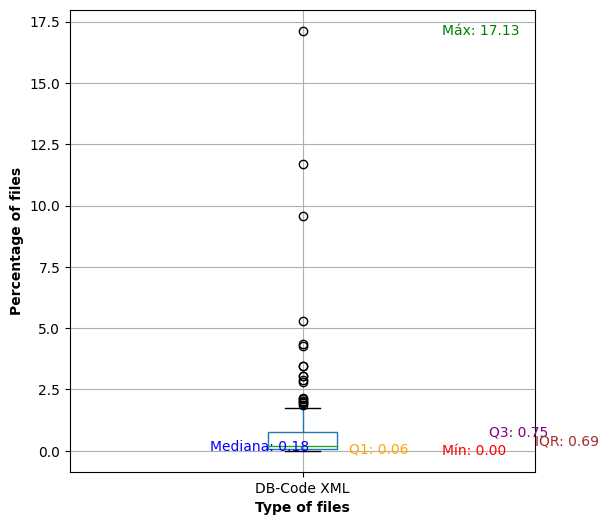

In [30]:
# Configurar a figura
plt.figure(figsize =(6, 6))

# Gerar o boxplot, sem outliers
stud_bplt = df.boxplot(column=['DB-Code XML'])

# Extração das estatísticas do DataFrame (mediana, máximo e mínimo)
stats = df['DB-Code XML'].describe()
mediana = stats['50%']
maximo = stats['max']
minimo = stats['min']
q1 = stats['25%']  # Primeiro quartil (Q1)
q3 = stats['75%']  # Terceiro quartil (Q3)
iqr = q3 - q1      # Intervalo interquartílico (IQR)

# Adicionar as anotações ao gráfico
plt.text(0.8, mediana, f'Mediana: {mediana:.2f}', verticalalignment='center', color='blue')
plt.text(1.3, maximo, f'Máx: {maximo:.2f}', verticalalignment='center', color='green')
plt.text(1.3, minimo, f'Mín: {minimo:.2f}', verticalalignment='center', color='red')
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='orange')
plt.text(1.4, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='purple')
plt.text(1.5, (q1 + q3) / 2, f'IQR: {iqr:.2f}', verticalalignment='center', color='brown')

# Configurações dos eixos
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")

# Mostrar o gráfico
plt.show()

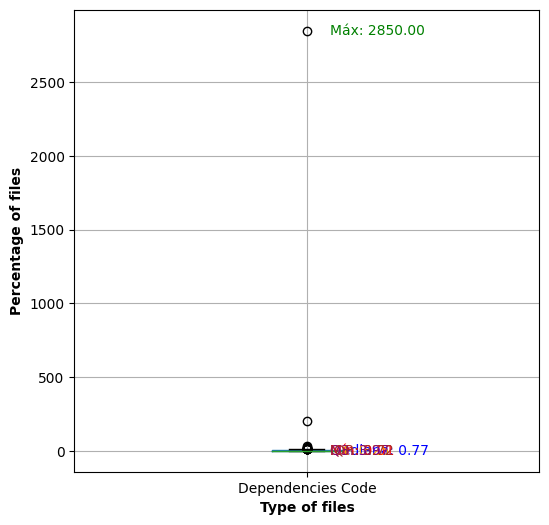

In [31]:
# Configurar a figura
plt.figure(figsize =(6, 6))

# Gerar o boxplot, sem outliers
stud_bplt = df.boxplot(column=['Dependencies Code'])

# Extração das estatísticas do DataFrame (mediana, máximo e mínimo)
stats = df['Dependencies Code'].describe()
mediana = stats['50%']
maximo = stats['max']
minimo = stats['min']
q1 = stats['25%']  # Primeiro quartil (Q1)
q3 = stats['75%']  # Terceiro quartil (Q3)
iqr = q3 - q1      # Intervalo interquartílico (IQR)

# Adicionar as anotações ao gráfico
plt.text(1.05, mediana, f'Mediana: {mediana:.2f}', verticalalignment='center', color='blue')
plt.text(1.05, maximo, f'Máx: {maximo:.2f}', verticalalignment='center', color='green')
plt.text(1.05, minimo, f'Mín: {minimo:.2f}', verticalalignment='center', color='red')
plt.text(1.05, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='orange')
plt.text(1.05, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='purple')
plt.text(1.05, (q1 + q3) / 2, f'IQR: {iqr:.2f}', verticalalignment='center', color='brown')

# Configurações dos eixos
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")

# Mostrar o gráfico
plt.show()


In [32]:
import pandas as pd

# Supondo que df é o seu DataFrame e 'DB-Code Java' é a coluna de interesse
data = df['Dependencies Code']

# Calcular Q1 e Q3
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Calcular IQR
iqr = q3 - q1

# Calcular os limites inferior e superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar os dados, excluindo os outliers
data_filtrada = data[(data >= limite_inferior) & (data <= limite_superior)]

# Calcular o valor máximo sem outliers
maximo_sem_outliers = data_filtrada.max()

print(f'Valor máximo (sem outliers): {maximo_sem_outliers:.2f}')


Valor máximo (sem outliers): 9.47


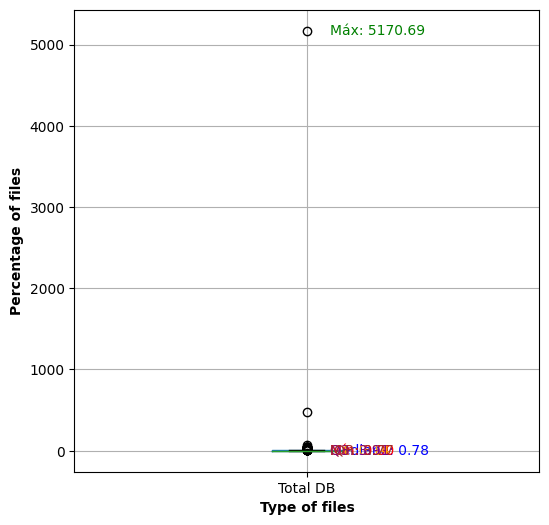

In [33]:
# Configurar a figura
plt.figure(figsize =(6, 6))

# Gerar o boxplot, sem outliers
stud_bplt = df.boxplot(column=['Total DB'])

# Extração das estatísticas do DataFrame (mediana, máximo e mínimo)
stats = df['Total DB'].describe()
mediana = stats['50%']
maximo = stats['max']
minimo = stats['min']
q1 = stats['25%']  # Primeiro quartil (Q1)
q3 = stats['75%']  # Terceiro quartil (Q3)
iqr = q3 - q1      # Intervalo interquartílico (IQR)

# Adicionar as anotações ao gráfico
plt.text(1.05, mediana, f'Mediana: {mediana:.2f}', verticalalignment='center', color='blue')
plt.text(1.05, maximo, f'Máx: {maximo:.2f}', verticalalignment='center', color='green')
plt.text(1.05, minimo, f'Mín: {minimo:.2f}', verticalalignment='center', color='red')
plt.text(1.05, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='orange')
plt.text(1.05, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='purple')
plt.text(1.05, (q1 + q3) / 2, f'IQR: {iqr:.2f}', verticalalignment='center', color='brown')

# Configurações dos eixos
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")

# Mostrar o gráfico
plt.show()


In [34]:
import pandas as pd

# Supondo que df é o seu DataFrame e 'DB-Code Java' é a coluna de interesse
data = df['Total DB']

# Calcular Q1 e Q3
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Calcular IQR
iqr = q3 - q1

# Calcular os limites inferior e superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar os dados, excluindo os outliers
data_filtrada = data[(data >= limite_inferior) & (data <= limite_superior)]

# Calcular o valor máximo sem outliers
maximo_sem_outliers = data_filtrada.max()

print(f'Valor máximo (sem outliers): {maximo_sem_outliers:.2f}')

Valor máximo (sem outliers): 8.64


In [35]:
import pandas as pd

# Supondo que df é o seu DataFrame e as colunas de interesse estão listadas
columns_of_interest = ['DB-Code XML','DB-Code Java', 'Dependencies Code', 'Total DB']

# Dicionário para armazenar a contagem de outliers por coluna
outliers_count = {}

for column in columns_of_interest:
    # Filtrar os dados da coluna
    data = df[column].dropna()  # Remover valores NaN
    
    # Calcular Q1, Q3 e IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # Definir os limites inferior e superior para detectar outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    # Contar os outliers (valores abaixo do limite inferior ou acima do limite superior)
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    outliers_count[column] = len(outliers)  # Contar os outliers

# Exibir a contagem de outliers por coluna
for column, count in outliers_count.items():
    print(f'{column}: {count} outliers')


DB-Code XML: 18 outliers
DB-Code Java: 16 outliers
Dependencies Code: 15 outliers
Total DB: 41 outliers


<Figure size 1700x600 with 0 Axes>

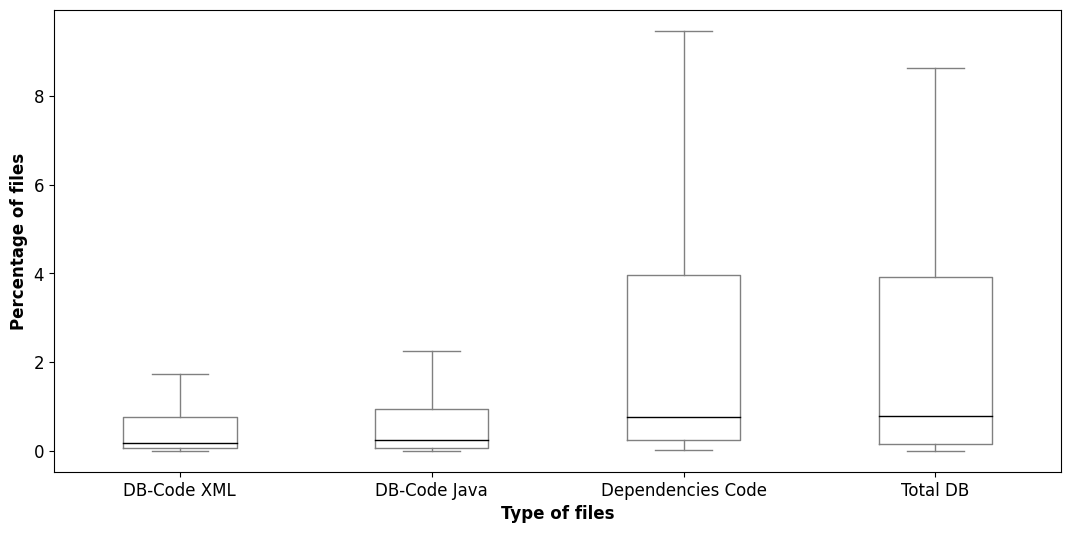

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))

filerproperties = dict(markerfacecolor = 'gray', markeredgecolor = 'gray')
colors = dict(boxes = 'gray', medians = 'black', caps = 'gray', whiskers = 'gray')

plt.figure(figsize =(13, 6))

stud_bplt = df.boxplot(column=['DB-Code XML','DB-Code Java', 'Dependencies Code', 'Total DB'], showfliers=False,
                       showmeans= False, fontsize=12, sym=".", color = colors, grid=False);

stud_bplt.plot()
plt.ylabel("Percentage of files", fontweight = "bold", fontsize=12)
plt.xlabel("Type of files", fontweight = "bold", fontsize=12)
plt.savefig(IMAGES_DIR+"/fig7.pdf", format="pdf", bbox_inches="tight")
plt.show()


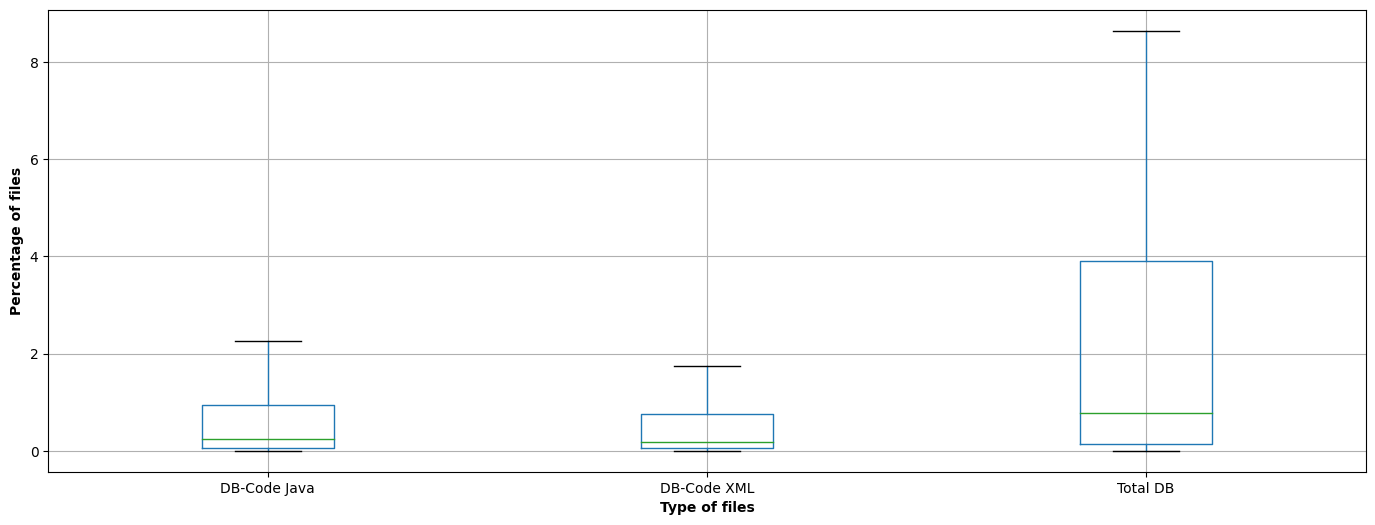

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[6]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))
stud_bplt = df.boxplot(column=['DB-Code Java', 'DB-Code XML',  'Total DB'], showfliers=False) #'Dependencies',

stud_bplt.plot()
plt.ylabel("Percentage of files", fontweight = "bold")
plt.xlabel("Type of files", fontweight = "bold")
plt.show()

In [39]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA_COMPLET

# Ler os dois arquivos .xlsx
df = pd.read_excel(ANNOTATED_FILE_JAVA_COMPLET, keep_default_na=False, sheet_name='2021')
df1 = df[df['discardReason'] == ''] #filtra os projetos sem discardReason
#df1 = pd.read_excel('arquivo2.xlsx')  # DataFrame 2

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df2 = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

# Verificar quais itens da coluna 'name' em df1 estão presentes na coluna 'projects' de df2
itens_presentes = df2['name'].isin(df1['name'])

# Exibir o resultado: True para os itens que estão presentes, False para os que estão faltando
#print(itens_presentes)

# Filtrar os itens que estão presentes
nomes_presentes = df2[itens_presentes]
#print("Itens presentes em ambas as colunas:")
#print(nomes_presentes)

# Filtrar os itens que estão faltando
nomes_faltando = df2[~itens_presentes]
#print("\nItens da coluna 'name' que estão faltando em 'projects':")
#print(nomes_faltando)

# Converter as colunas para sets
names_set = set(df1['name'])
projects_set = set(df2['name'])

# Verificar se os conjuntos são iguais
if names_set == projects_set:
    print("Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).")
else:
    print("As colunas 'name' e 'projects' têm valores diferentes.")
    
# Itens presentes em 'name' mas não em 'projects'
names_faltando = names_set - projects_set
print("\nItens presentes em 'name' mas não em 'projects':", names_faltando)

# Itens presentes em 'projects' mas não em 'name'
projects_faltando = projects_set - names_set
print("Itens presentes em 'projects' mas não em 'name':", projects_faltando)

if len(df1['name']) == len(df2['name']):
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são iguais.")
else:
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são diferentes.")

duplicados_projects = df2['name'].duplicated(keep=False)

# Filtrar os projetos duplicados
projetos_duplicados = df2.loc[duplicados_projects, 'name'].unique()

if len(projetos_duplicados) > 0:
    print(f"\nProjetos duplicados: {', '.join(projetos_duplicados)}")
else:
    print("\nNão existem itens duplicados na coluna 'projects'.")

Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).

Itens presentes em 'name' mas não em 'projects': set()
Itens presentes em 'projects' mas não em 'name': set()

As quantidades de itens nas colunas 'name' e 'projects' são iguais.

Projetos duplicados: android


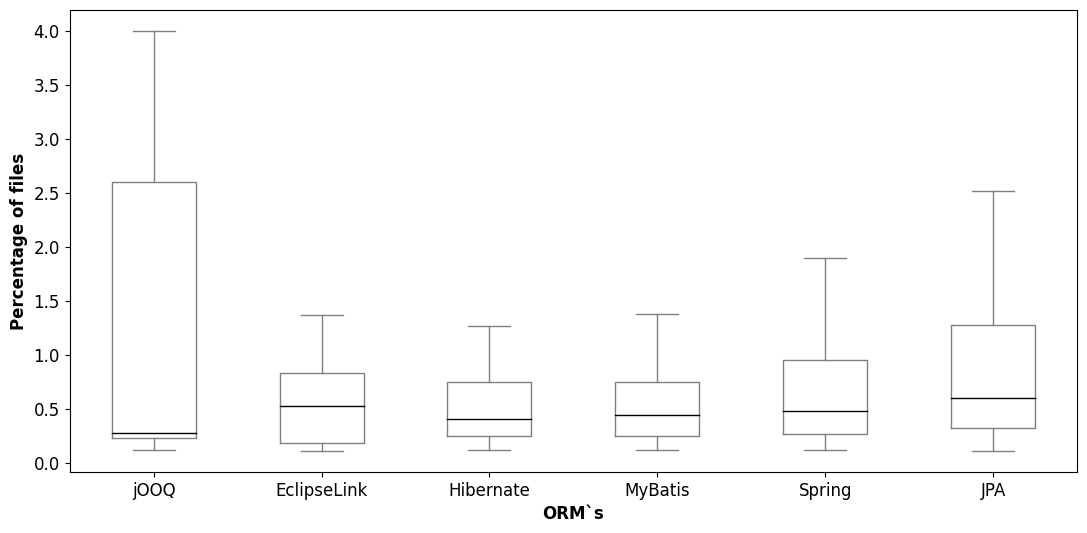

In [55]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

df = df.rename(columns={"mybatis": "MyBatis"})


#figWidth = 4; figHeigth = 4.1;
filerproperties = dict(markerfacecolor = 'gray', markeredgecolor = 'gray')
colors = dict(boxes = 'gray', medians = 'black', caps = 'gray', whiskers = 'gray')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['jOOQ', 'EclipseLink', 'Hibernate', 'MyBatis', 'Spring', 'JPA' ], showfliers=False,
                       showmeans= False, fontsize=12, sym=".", color = colors, grid=False);
stud_bplt.plot()
plt.xlabel("ORM`s", fontweight = "bold",  fontsize=12)
plt.ylabel("Percentage of files", fontweight = "bold", fontsize=12)

plt.savefig(IMAGES_DIR+"/fig6.pdf", format="pdf", bbox_inches="tight")
plt.show()



In [56]:
import pandas as pd

# Supondo que df é o seu DataFrame e as colunas de interesse estão listadas
columns_of_interest = ['Hibernate', 'MyBatis', 'EclipseLink', 'Spring', 'jOOQ', 'JPA']

# Dicionário para armazenar a contagem de outliers por coluna
outliers_count = {}

for column in columns_of_interest:
    # Filtrar os dados da coluna
    data = df[column].dropna()  # Remover valores NaN
    
    # Calcular Q1, Q3 e IQR
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    # Definir os limites inferior e superior para detectar outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    # Contar os outliers (valores abaixo do limite inferior ou acima do limite superior)
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    outliers_count[column] = len(outliers)  # Contar os outliers

# Exibir a contagem de outliers por coluna
for column, count in outliers_count.items():
    print(f'{column}: {count} outliers')


Hibernate: 14 outliers
MyBatis: 20 outliers
EclipseLink: 2 outliers
Spring: 8 outliers
jOOQ: 1 outliers
JPA: 15 outliers


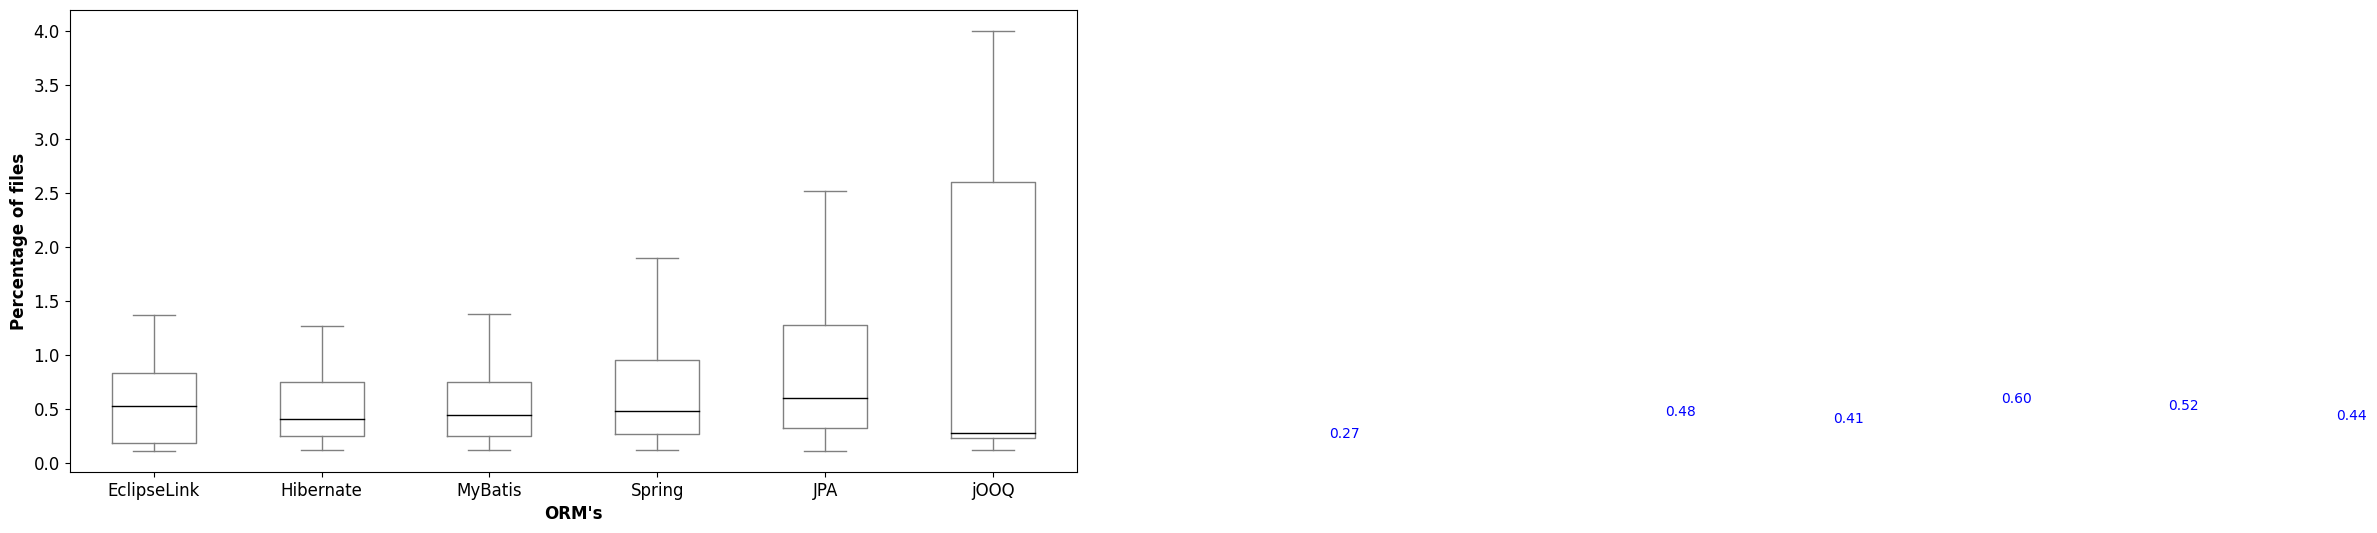

In [57]:
import matplotlib.pyplot as plt

# Configurar o caminho do arquivo de dados
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine='openpyxl')

# Renomear coluna, se necessário
df = df.rename(columns={"mybatis": "MyBatis"})

# Definir propriedades das cores e dos outliers
filerproperties = dict(markerfacecolor='gray', markeredgecolor='gray')
colors = dict(boxes='gray', medians='black', caps='gray', whiskers='gray')

# Configurar a figura
plt.figure(figsize=(13, 6))

# Gerar o boxplot, desativando os outliers
stud_bplt = df.boxplot(column=['EclipseLink', 'Hibernate', 'MyBatis', 'Spring', 'JPA', 'jOOQ'],
                       showfliers=False, showmeans=False, fontsize=12, sym=".", color=colors, grid=False)

# Adicionar as linhas do boxplot
stud_bplt.plot()

# Adicionar os valores das medianas diretamente no gráfico
for column in ['EclipseLink', 'Hibernate', 'MyBatis', 'Spring', 'JPA', 'jOOQ']:
    mediana = df[column].median()
    # Definir a posição x para cada boxplot (varia entre 1 e o número de colunas)
    x_position = list(df.columns).index(column)
    plt.text(x_position, mediana, f'{mediana:.2f}', verticalalignment='center', color='blue', fontsize=10)

# Configurar os rótulos dos eixos
plt.xlabel("ORM's", fontweight="bold", fontsize=12)
plt.ylabel("Percentage of files", fontweight="bold", fontsize=12)

# Salvar o gráfico
#plt.savefig(IMAGES_DIR + "/fig6.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [59]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

columns_to_drop = ['sha1', 'part_commit', 'date_commit', 'isLast', 'owner']
df = df.drop(columns=columns_to_drop)

df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df.head()

,name,domain
0,Activiti,Enterprise Resource Planning
1,lottie-android,Game
2,spring-cloud-alibaba,Software Development
3,nacos,Infrastructure Management
4,fastjson,Data Management


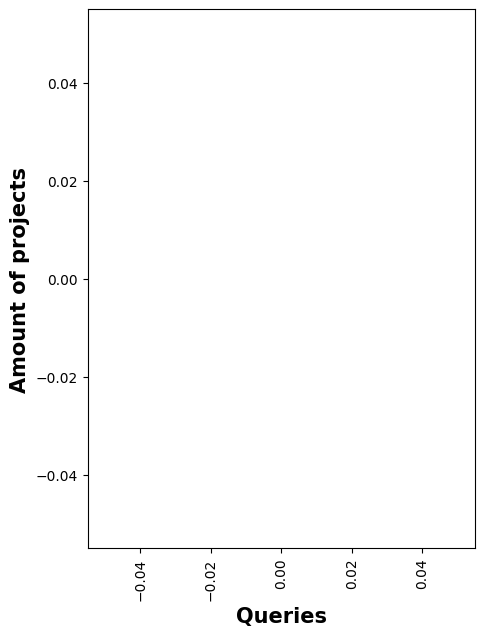

In [60]:
plt.figure(figsize=(5,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.xlabel("Queries", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Type of file', ylabel='Total'>

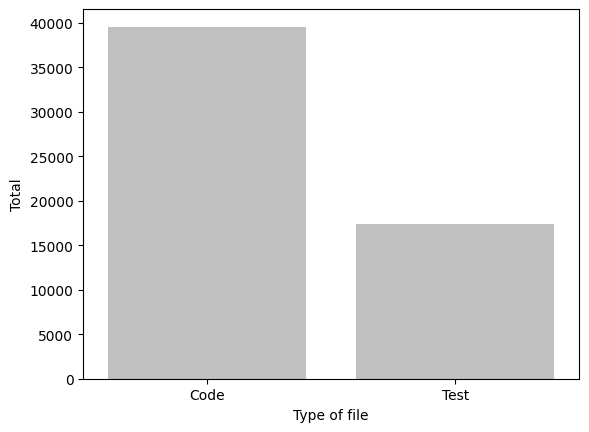

In [61]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'Total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'Total', data = dados, color = 'silver')

<Figure size 1600x1600 with 0 Axes>

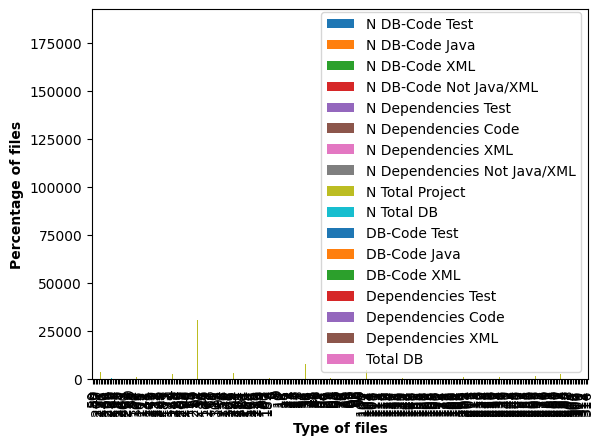

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize =(16, 16))

stud_bplt = data_with_index.plot.bar(column=['N Total DB', 'N Dependencies Code'])

plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")
plt.show()


In [68]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.03, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984


In [ ]:
ARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984


In [ ]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')
#df_usage_fan_in.rename(columns={"A": "a", "B": "c"})

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
#implementation_usage = implementation_usage.drop(columns=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,N DB-Code Test,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,automation,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,33.0,...,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,infrastructure management,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,34.0,...,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,media,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,NaN,...,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,infrastructure management,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,...,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,infrastructure management,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [ ]:
implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Total DB'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()




,ListFrameworks,NumberDBFiles
0,,"[0.3908794788273616, 1.340897369778236, nan, n..."
1,Hibernate,"[nan, 0.482218203737191, 0.627177700348432, na..."
2,JPA,"[nan, nan, 4.826254826254826, 0.85959885386819..."
3,JPA/Hibernate,"[0.6314127861089187, 0.8616529951058111, nan, ..."
4,Spring,"[nan, nan, nan, nan, 45.91836734693878, nan, n..."


In [ ]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df['SumPerProject'] = df.sum(axis=1)

df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)


Projects         44
Domains          44
Builder          44
SQL              44
SumPerProject    44
dtype: int64
Projects         279
Domains          279
Builder          279
SQL              279
SumPerProject    279
dtype: int64
Projects         45
Domains          45
Builder          45
SQL              45
SumPerProject    45
dtype: int64
Projects         37
Domains          37
Builder          37
SQL              37
SumPerProject    37
dtype: int64


<ipython-input-12-12577625220d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['SumPerProject'] = df.sum(axis=1)


In [62]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'count_implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4] #4
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df = df.dropna(axis = 0, how = 'all', subset=['mybatis', 'jOOQ', 'Spring', 'JPA', 'JDBC', 'Hibernate', 'EclipseLink'])
size_df = len(df)
df_framework = df.sum(axis=0, numeric_only=True)
media = df_framework.sum() / size_df

df_frameworks = df.median(numeric_only=True)
df_frameworks.median()
print(df_frameworks.median())

df_frameworks = df.mean(numeric_only=True)
print(df_frameworks.mean())

0.5243806894438455
483.46080680234667


In [63]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx', 'count_implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[5]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df_Builder_sql = df.median(axis = 0, numeric_only=True)
df_Builder_sql

part_commit    76.0
isLast          1.0
dtype: float64